In [1]:
import numpy as np
import tensorflow as tf
import cv2
import os
import sys
import matplotlib.pyplot as plt
#import matplotlib.image as image
import random
import time
%load_ext memory_profiler

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def time_sleep():
    for i in range(5):
        time.sleep(1)
        print('.', end = '')
    print()

In [3]:
def gen_label(image):
    try:
        label = image.split('.')[-3]
    except:
        label = None
    finally:
        if label == 'cat':
            return [1, 0]
        elif label == 'dog':
            return [0, 1]
        else:
            return [0, 0]

In [4]:
def read_directory(**kwargs):
    array_of_img = []
    for filename in os.listdir(kwargs['directory_name']):
        #if (filename == '')
        label = gen_label(filename)
        img = cv2.imread(kwargs['directory_name'] + "/" + filename)
        if img is None:
            pass
        else:
            array_of_img.append([img, np.array(label)])
    
    return np.array(array_of_img)

In [5]:
def display_one(a, title1 = "Original"):
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.show()

def display(a, b, title1 = "Original", title2 = "Edited"):
    plt.subplot(121)
    plt.imshow(a)
    plt.title(title1)
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(b)
    plt.title(title2)
    plt.show()

In [6]:
## 1. read datas that each data has three-dimension (height, width, RGB)

#print(os.path.abspath('.'))

print('----------------------------')
print('cats train_data loading', end = '')
train_cat = read_directory(directory_name = 'image/dataset/training_set/cats')
#data = read_directory(array_image = array_of_img, directory_name = '/Users/mac08/tool/dataset/training_set/cats')
time_sleep()
print('train_cat memory:  {} kb'. format(sys.getsizeof(train_cat) / 100))
print('----------------------------')
print('dogs train_data loading', end = '')
train_dog = read_directory(directory_name = 'image/dataset/training_set/dogs')
time_sleep()
print('train_dog memory:  {} kb'. format(sys.getsizeof(train_dog) / 100))
print('----------------------------')
print('cats test_data loading', end = '')
test_cat = read_directory(directory_name = 'image/dataset/test_set/cats')
time_sleep()
print('test_cat memory:  {} kb'. format(sys.getsizeof(test_cat) / 100))
print('----------------------------')
print('dogs test_data loading', end = '')
test_dog = read_directory(directory_name = 'image/dataset/test_set/dogs')
time_sleep()
print('test_dog memory:  {} kb'. format(sys.getsizeof(test_dog) / 100))
print('----------------------------')
print('clean memeory space')


----------------------------
cats train_data loading.....
train_cat memory:  641.12 kb
----------------------------
dogs train_data loading.....
train_dog memory:  641.12 kb
----------------------------
cats test_data loading.....
test_cat memory:  161.12 kb
----------------------------
dogs test_data loading.....
test_dog memory:  161.12 kb
----------------------------
clean memeory space


In [7]:
#data = np.reshape(data, (data.shape[0], data[0][0].shape[0], data[0][0].shape[1], data[0][0].shape[2]))
print(train_cat.shape)
print(train_dog.shape)
print(test_cat.shape)
print(test_dog.shape)
#print(data[0][0].shape)

(4000, 2)
(4000, 2)
(1000, 2)
(1000, 2)


In [8]:
train_data = np.vstack((train_cat, train_dog))
test_data = np.vstack((test_cat, test_dog))

In [9]:
random.shuffle(train_data)
random.shuffle(test_data)
print(train_data.shape)
print(test_data.shape)

(8000, 2)
(2000, 2)


In [11]:
## 3. distribution train, valid and test data
train_image, train_label = (train_data[:, 0], train_data[:, 1])
valid_image, valid_label = (test_data[:1500, 0], test_data[:1500, 1])
test_image, test_label = (test_data[1500:, 0], test_data[1500:, 1])
print('train_image shape: ',train_image.shape)
print('valid_image shape: ',valid_image.shape)
print('test_image shape: ',test_image.shape)
print('train_label shape: ',train_label.shape)
print('valid_label shape: ',valid_label.shape)
print('test_label shape: ',test_label.shape)

train_image shape:  (8000,)
valid_image shape:  (1500,)
test_image shape:  (500,)
train_label shape:  (8000,)
valid_label shape:  (1500,)
test_label shape:  (500,)


In [12]:
train_cat = None
train_dog = None
train_data = None
test_cat = None
test_dog = None
test_data = None

In [13]:
## 2. resize each data
def processing(data, lab):
    #img = [cv2.imread(i, cv2.IMREAD_UNCHANGED) for i in data[:3]]
    
    print('The Second Original size', data[1].shape)
    height = 100
    width = 100
    dim = (width, height)
    res_img = []
    res_lab = []
    for i in range(len(data)):
        res = cv2.resize(data[i], dim, interpolation = cv2.INTER_LINEAR)
        res_img.append(res)
        res_lab.append(lab[i])
        
    print("The Second Resized size", res_img[1].shape)
    resized = res_img[1]
    display(data[1], resized, 'Originial', 'Resized')
    return np.array(res_img), np.array(res_lab)

The Second Original size (280, 300, 3)
The Second Resized size (100, 100, 3)


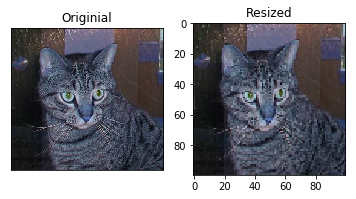

The Second Original size (415, 498, 3)
The Second Resized size (100, 100, 3)


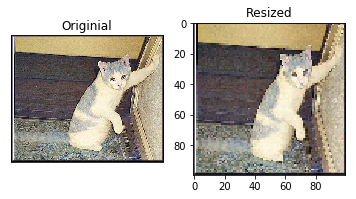

The Second Original size (499, 334, 3)
The Second Resized size (100, 100, 3)


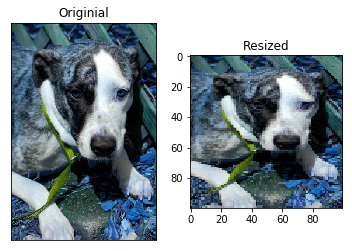

In [14]:
train_image, train_label = processing(train_image, train_label)
valid_image, valid_label = processing(valid_image, valid_label)
test_image, test_label = processing(test_image, test_label)

In [15]:
print('train_image shape: ', train_image.shape)
print('train_label shape: ', train_label.shape)
print('train_label the first shape: ', train_label[0].shape)
print('train_label the first type: ', type(train_label[0]))
print('train_label the first content: ', train_label[0])

train_image shape:  (8000, 100, 100, 3)
train_label shape:  (8000, 2)
train_label the first shape:  (2,)
train_label the first type:  <class 'numpy.ndarray'>
train_label the first content:  [1 0]


In [30]:
def normalization(data):
    data = data / 255.
    return data

In [31]:
train_image = normalization(train_image)
valid_image = normalization(valid_image)
test_image = normalization(test_image)

In [32]:
## 4. initial variable
weights = None
biases = None
train_image = np.reshape(train_image, (train_image.shape[0], 100 * 100 * 3))
valid_image = np.reshape(valid_image, (valid_image.shape[0], 100 * 100 * 3))
test_image = np.reshape(test_image, (test_image.shape[0], 100 * 100 * 3))
n_images = 100 * 100 * 3
#n_images = [50, 50, 3]
n_labels = 2
learning_rate = 1e-3
graph = tf.Graph()
sess = tf.Session(graph = graph)

In [42]:
## 5. initial Graph structure
with graph.as_default():
    train_images = tf.placeholder(tf.float32, [None,  n_images])
    train_labels = tf.placeholder(tf.float32, [None, n_labels])
    
    weights, biases, _y, loss = structure(images = train_images,
                                          labels = train_labels,
                                          weights = weights,
                                          biases = biases)
    train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)
    
    new_images = tf.placeholder(tf.float32, [None,  n_images])
    new_labels = tf.placeholder(tf.float32, [None, n_labels])
    weights, biases, new_y, new_loss = structure(images = new_images,
                                                 labels = new_labels,
                                                 weights = weights,
                                                 biases = biases)
    init_op = tf.global_variables_initializer()

In [33]:
def structure(images, labels, weights, biases):
    if (weights is None) or (biases is None):
        weights = {
           # 'conv1' : tf.Variable(tf.truncated_normal([50, 50, 3, 6], stddev = 0.1)),
            'fc1' : tf.Variable(tf.truncated_normal([n_images, n_labels]))
        }
        biases = {
            #'conv1' : tf.Variable(tf.zeros([6], dtype = tf.float32)),
            'fc1' : tf.Variable(tf.zeros([n_labels], dtype = tf.float32))    
        }
    '''
    conv1 = get_conv_2d_layer(images,
                              weights['conv1'],
                              biases['conv1'],
                              activation = tf.nn.relu)
    pool2 = tf.nn.max_pool(conv1,
                           ksize = [1, 2, 2, 3], strides = [1, 2, 2, 3], padding = 'VALID')
    
    flatten = get_flatten_layer(pool2)
    '''
    logits = get_dense_layer(images = images,
                             weight = weights['fc1'],
                             bias = biases['fc1'])
    _y = tf.nn.softmax(logits)
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = labels, logits = logits))
    
    return (weights, biases, _y, loss)

In [34]:
def get_conv_2d_layer(images, weight, bias, strides = (1, 1), padding = 'VALID', activation = None):
    x = tf.add(
        tf.nn.conv2d(images,
                     weight,
                     [1, strides[0], strides[1], 3],
                     padding = padding), bias)
    if activation:
        x = activation(x)
    return x

In [35]:
def get_dense_layer(images, weight, bias, activation = None):
    x = tf.add(tf.matmul(images, weight), bias)
    if activation:
        x = activation(x)
    return x

In [36]:
def get_flatten_layer(input_layer):
    shape = input_layer.get_shape().as_list() #only tensor can used
    n = 1
    for s in shape[1:]:
        n = n * s
        print('n :', n)
    x = tf.reshape(input_layer, [-1, n])
    return x

In [37]:
def _check_array(ndarray):
    ndarray = np.array(ndarray)
    if len(ndarray) == 1:
        ndarray = np.reshape(ndarray, (1, ndarray.shape[0]))
    return ndarray

In [38]:
def predict(X):
    X = _check_array(X)
    #y = _check_array(y)
    
    feed_dict = {
         new_images : X
     #    new_labels : y
    }
    return sess.run(new_y, feed_dict = feed_dict)

In [39]:
def evaluate(X, y):
    X = _check_array(X)
    y = _check_array(y)
    feed_dict = {
        new_images : X,
        new_labels : y
    }
    return sess.run(new_loss, feed_dict)

In [40]:
def accuracy(predictions, labels):
    return np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0]

In [41]:
def fit(X, y, epochs = 10, learning_rate = 1e-3, valid_data = None, test_data = None):
    X = _check_array(X)
    y = _check_array(y)
    
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []
    val_loss_list = []
    val_acc_list = []
    sess.run(init_op)
    for epoch in range(epochs):
        print('Epoch %2d/%2d: ' % (epoch + 1, epochs))
        
        feed_dict = {
            train_images : X,
            train_labels : y
        }
        sess.run(train_op, feed_dict = feed_dict)
        Y = predict(X)
        train_loss = evaluate(X, y)
        train_acc = accuracy(Y, y)
        train_loss_list.append(train_loss)
        train_acc_list.append(train_acc)
        print('train loss %8.4f, train acc %3.2f%%' % (train_loss, train_acc * 100), end = '')
        
        if valid_data is not None:
            val_Y = predict(valid_data[0])
            val_loss = evaluate(valid_data[0], valid_data[1])
            val_acc = accuracy(val_Y, valid_data[1])
            val_loss_list.append(val_loss)
            val_acc_list.append(val_acc)
            print('val loss %8.4f, val acc %3.2f%%' % (val_loss, val_acc * 100))
            
        if test_data is not None:
            test_Y = predict(test_data[0])
            test_acc = accuracy(test_Y, test_data[1])
            print('test acc %3.2f%%' % (test_acc * 100))
    
    ans = {
        'train_loss' : train_loss_list,
        'train_acc' : train_acc_list,
        'val_loss' : val_loss_list,
        'val_acc' : val_acc_list,
        'test_acc' : test_acc_list
    }
    
    return ans

In [43]:
dic_ans = fit(X = train_image,
              y = train_label,
              epochs = 50,
              learning_rate = 1e-3,
              valid_data = (valid_image, valid_label),
              test_data = (test_image, test_label))

Epoch  1/50: 
train loss  90.8026, train acc 16.66%val loss 101.2440, val acc 8.27%
test acc 41.60%
Epoch  2/50: 
train loss  82.4240, train acc 17.20%val loss  91.9456, val acc 9.33%
test acc 41.60%
Epoch  3/50: 
train loss  74.2636, train acc 18.01%val loss  82.8654, val acc 9.67%
test acc 41.20%
Epoch  4/50: 
train loss  66.3533, train acc 19.12%val loss  74.0736, val acc 11.80%
test acc 41.00%
Epoch  5/50: 
train loss  58.8108, train acc 20.96%val loss  65.6975, val acc 14.87%
test acc 41.40%
Epoch  6/50: 
train loss  51.7917, train acc 23.75%val loss  57.9315, val acc 17.80%
test acc 42.20%
Epoch  7/50: 
train loss  45.4049, train acc 26.22%val loss  50.8055, val acc 20.80%
test acc 44.20%
Epoch  8/50: 
train loss  39.6743, train acc 28.82%val loss  44.3056, val acc 23.93%
test acc 47.00%
Epoch  9/50: 
train loss  34.6150, train acc 31.95%val loss  38.5186, val acc 27.67%
test acc 49.00%
Epoch 10/50: 
train loss  30.3007, train acc 35.31%val loss  33.5660, val acc 32.00%
test acc 

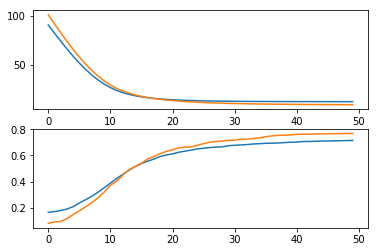

In [44]:
plt.subplot(211)
plt.plot(dic_ans['train_loss'])
plt.plot(dic_ans['val_loss'])
plt.subplot(212)
plt.plot(dic_ans['train_acc'])
plt.plot(dic_ans['val_acc'])

In [234]:
%who_ls

[]

In [231]:
import gc

In [232]:
gc.collect()

33332

In [233]:
%reset -f